# [SVM으로 분석하는 이미지](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

- 딥러닝은 최대한 공식을 사용하지 않고 w,b 값을 무작위로 주고, 값을 업데이트하면서 오차를 줄여나가는 과정(y값이 예측, 이항분류, 다항분류에 따라 y_hat과w,b 갱신 공식이 달라짐)
- 이미지등의 비정형 데이터 분석은 2007년 이전 또는 텐서플로우 안나왓을때는svm등의 통계학 코드로 작업함

In [1]:

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

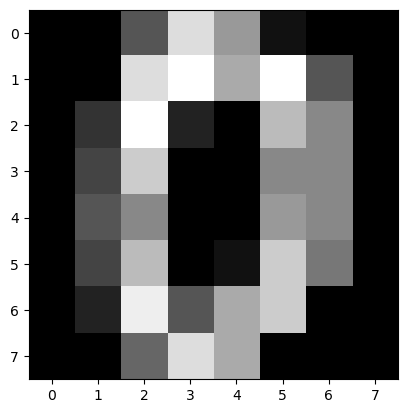

In [12]:
# array로 구성됨, 
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap='gray')   # 8*8 의 이미지 파일 숫자0은 검정색,
plt.show()

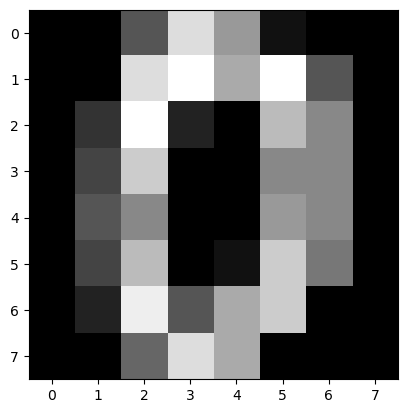

In [15]:
cnt = 0
digits.target[cnt]
plt.imshow(digits.images[cnt], cmap='gray')   # 8*8 의 이미지 파일 숫자0은 검정색,
plt.show()

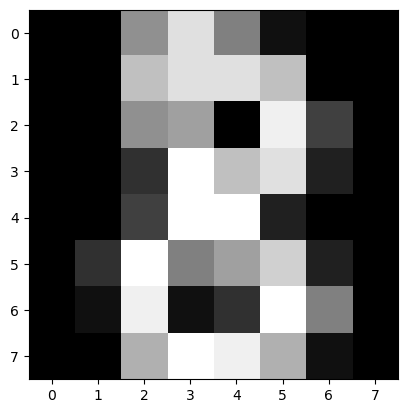

In [16]:
cnt = 8
digits.target[cnt]
plt.imshow(digits.images[cnt], cmap='gray')   # 8*8 의 이미지 파일 숫자0은 검정색,
plt.show()

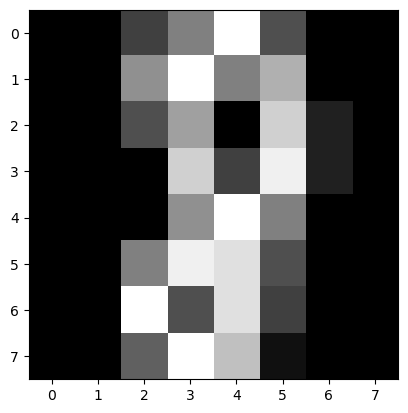

In [19]:
cnt = 53
digits.target[cnt]
plt.imshow(digits.images[cnt], cmap='gray')
plt.show()

In [20]:
len(digits.target), len(digits.images)

(1797, 1797)

In [22]:
import numpy as np
np.shape(digits.target), np.shape(digits.images)

((1797,), (1797, 8, 8))

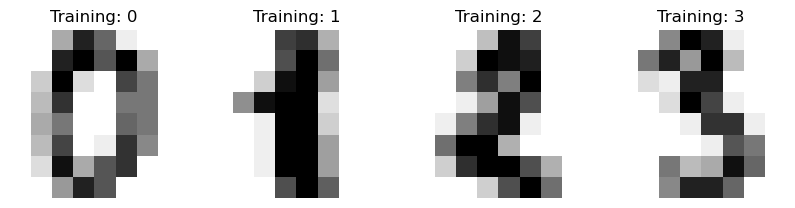

In [26]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Training: {label}')
plt.show()

In [27]:
# 모든 머신러닝은 가로*세로를 이해하지 못함
# 가로*세로 값을 가로로 모두 변경해야 함
# 현재 8*8이라면 64개로 변경해서 x1,x2,x3...x64의 x변수를 만듬
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # (1797, 8, 8) 을 (1797, -1) 로 즉 1797, 64
data.shape

(1797, 64)

In [37]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
predicted[:5] # X_test에 있는 이미지를 분석한결과 y레이블값

array([8, 8, 4, 9, 0])

In [32]:
X_test[0].reshape(8,8).shape

(8, 8)

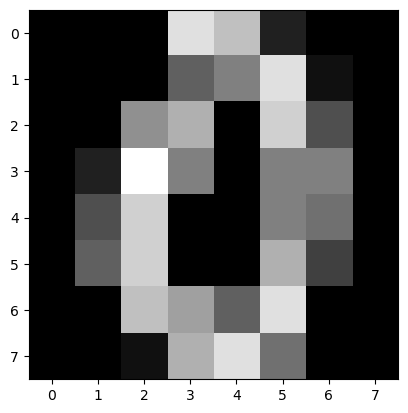

In [41]:
cnt = 4
tmp = X_test[cnt].reshape(8,8) 
plt.imshow(tmp, cmap='gray')
plt.show()

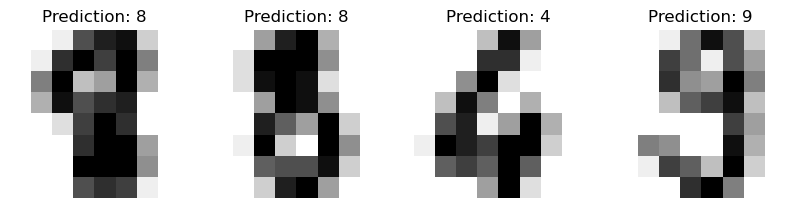

In [45]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)     # 현재 64개의 X변수로 되어 있어 가로*세로 변경해서 보여줘야 그림이 나옴
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
plt.show()

In [46]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


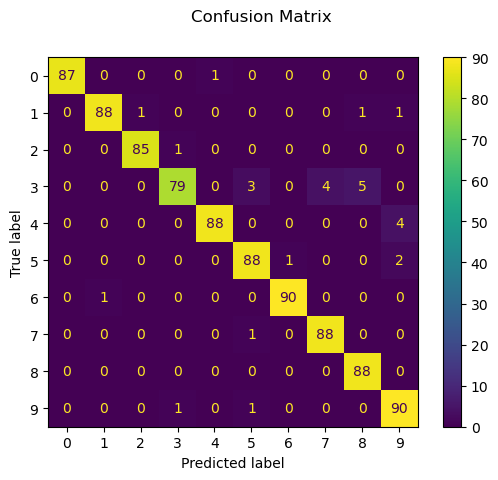

In [47]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [50]:
# 참고용 코드

# from PIL import Image
# img=Image.open('c:/data/sample1.png')
# img=img.convert('L')  # 흑백변환
# img=img.resize((8,8)) # 사이즈 맞춰야함
# arr=np.array(img)     # 배열로 변환
# print(arr.shape)

# 예측모델을 작업한 SVM에 입력한 사진과 같은 스케일링 필요, 개발자만 암

# print(arr.max(), arr.min())

# plt.imshow(arr,cmap='gray')
# newX=arr.reshape(1,-1)    # 64 x값으로 변환해야 함

# clf.predict(newX)
